In [1]:
import numpy as np
import pandas as pd
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [2]:
train_df = pd.read_csv('./data/fl_2022_LastName_train.csv.gz')
val_df = pd.read_csv('./data/fl_2022_LastName_val.csv.gz')
test_df = pd.read_csv('./data/fl_2022_LastName_test.csv.gz')

In [3]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(1079199, 4)
(134900, 4)
(134900, 4)


In [6]:
train_df = train_df.dropna()
val_df = val_df.dropna()
test_df = test_df.dropna()

## Extract features

In [4]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 2), lowercase=False)

In [7]:
X_train = vectorizer.fit_transform(train_df['name_last'])
X_val = vectorizer.transform(val_df['name_last'])
X_test = vectorizer.transform(test_df['name_last'])

In [8]:
X_train.shape

(1079191, 1588)

In [9]:
X_val.shape

(134896, 1588)

In [10]:
X_test.shape

(134898, 1588)

In [11]:
vectorizer.get_feature_names_out()

array([' ', " '", ' -', ..., 'zx', 'zy', 'zz'], dtype=object)

In [12]:
len(vectorizer.get_feature_names_out())

1588

In [13]:
vocab = vectorizer.get_feature_names_out()

In [14]:
y_train = train_df.race_code
y_val = val_df.race_code
y_test = test_df.race_code

In [15]:
y_train[0]

3

In [16]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(criterion = 'entropy', random_state=42, verbose=6, n_jobs=-1)

In [17]:
print(X_train.shape)
print(X_test.shape)

(1079191, 1588)
(134898, 1588)


## Training

## Doing it for 1 million with 100 iterations

In [ ]:
%%time
#Train the model using the training sets y_pred=clf.predict(X_test)

# 1 million
samples = 100 * 100 * 100
# 1 million records took 1h 11min 16s

clf.fit(X_train[:samples], y_train[:samples])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed: 42.9min


In [19]:
%%time
y_pred = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_val, y_pred))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:   30.8s remaining:    0.6s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   30.9s finished


Test Accuracy: 0.5578890404459732
CPU times: user 3min 4s, sys: 30.5 s, total: 3min 35s
Wall time: 32.3 s


In [20]:
%%time
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.7s


Test Accuracy: 0.5566872748298715
CPU times: user 21.7 s, sys: 388 ms, total: 22.1 s
Wall time: 3.04 s


[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    2.4s finished


In [21]:
joblib.dump(vectorizer, "models/rf_vec_lastname_1M.joblib", compress=3)  # compression is ON!

['models/rf_vec_lastname_1M.joblib']

In [22]:
joblib.dump(clf, "models/rf_model_lastname_1M.joblib", compress=3)  # compression is ON!

['models/rf_model_lastname_1M.joblib']

## Doing it for 2 million with 100 iterations

In [23]:
%%time
#Train the model using the training sets y_pred=clf.predict(X_test)
clf = RandomForestClassifier(criterion = 'entropy', random_state=42, verbose=6, n_jobs=-1)

# 2 million
samples = 2 * 100 * 100 * 100
# 1 million records took 2h 10min 13s
# 2 million records took 3h 50 mins
# 8 million records will take ~17 hours

clf.fit(X_train[:samples], y_train[:samples])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed: 49.6min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done  98 out of 100 | elapsed: 161.8min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 162.4min finished


CPU times: user 1d 2h 19min 34s, sys: 23min 28s, total: 1d 2h 43min 2s
Wall time: 2h 42min 31s


RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=42,
                       verbose=6)

In [24]:
%%time
y_pred = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Val Accuracy:", metrics.accuracy_score(y_val, y_pred))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   25.6s
[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:   37.6s remaining:    0.8s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   37.7s finished


Val Accuracy: 0.5544567666943423
CPU times: user 4min 40s, sys: 17.8 s, total: 4min 58s
Wall time: 46.6 s


In [25]:
%%time
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.9s


Test Accuracy: 0.5539296357247698
CPU times: user 20.9 s, sys: 108 ms, total: 21 s
Wall time: 2.83 s


[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    2.2s finished


In [26]:
joblib.dump(vectorizer, "models/rf_vec_lastname_2M.joblib", compress=3)  # compression is ON!

['models/rf_vec_lastname_2M.joblib']

In [27]:
joblib.dump(clf, "models/rf_model_lastname_2M.joblib", compress=3)  # compression is ON!

['models/rf_model_lastname_2M.joblib']

# Now lets do for the whole train dataset with 20 iterations

In [28]:
%%time

clf = RandomForestClassifier(n_estimators=20, criterion = 'entropy', random_state=42, verbose=6, n_jobs=-1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20


[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed: 15.5min remaining: 46.4min


building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20


[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed: 15.8min remaining: 19.3min


building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed: 31.0min remaining: 16.7min
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed: 31.5min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 31.8min finished


CPU times: user 5h 7min 22s, sys: 3min 50s, total: 5h 11min 13s
Wall time: 31min 55s


RandomForestClassifier(criterion='entropy', n_estimators=20, n_jobs=-1,
                       random_state=42, verbose=6)

In [29]:
%%time
y_pred = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Val Accuracy:", metrics.accuracy_score(y_val, y_pred))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of  20 | elapsed:    1.3s remaining:    4.0s
[Parallel(n_jobs=10)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.1s
[Parallel(n_jobs=10)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.3s
[Parallel(n_jobs=10)]: Done  17 out of  20 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:    4.0s finished


Val Accuracy: 0.5492156920887202
CPU times: user 23 s, sys: 641 ms, total: 23.6 s
Wall time: 5.1 s


In [30]:
%%time
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of  20 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=10)]: Done   9 out of  20 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=10)]: Done  13 out of  20 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  17 out of  20 | elapsed:    0.5s remaining:    0.1s


Test Accuracy: 0.5484514225563017
CPU times: user 7.48 s, sys: 249 ms, total: 7.73 s
Wall time: 5.52 s


[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:    2.3s finished


In [31]:
joblib.dump(vectorizer, "models/rf_vec_lastname.joblib", compress=3)  # compression is ON!

['models/rf_vec_lastname.joblib']

In [32]:
joblib.dump(clf, "models/rf_model_lastname.joblib", compress=3)  # compression is ON!

['models/rf_model_lastname.joblib']

## Confusion Matrix

In [33]:
race_id_df = train_df[['race', 'race_code']].drop_duplicates().sort_values('race_code')
race_to_id = dict(race_id_df.values)

In [34]:
race_to_id

{'other': 0, 'nh_black': 1, 'nh_white': 2, 'hispanic': 3, 'asian': 4}

In [35]:
id_to_race = dict(race_id_df[['race_code', 'race']].values)

In [36]:
id_to_race

{0: 'other', 1: 'nh_black', 2: 'nh_white', 3: 'hispanic', 4: 'asian'}

### For 1M model

In [37]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.6s
[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:    3.5s remaining:    0.1s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    3.5s finished


              precision    recall  f1-score   support

       asian       0.09      0.05      0.06      6867
    hispanic       0.69      0.66      0.68     38961
    nh_black       0.34      0.17      0.23     13726
    nh_white       0.60      0.73      0.66     60970
       other       0.17      0.15      0.16     14374

    accuracy                           0.56    134898
   macro avg       0.38      0.35      0.36    134898
weighted avg       0.53      0.56      0.54    134898



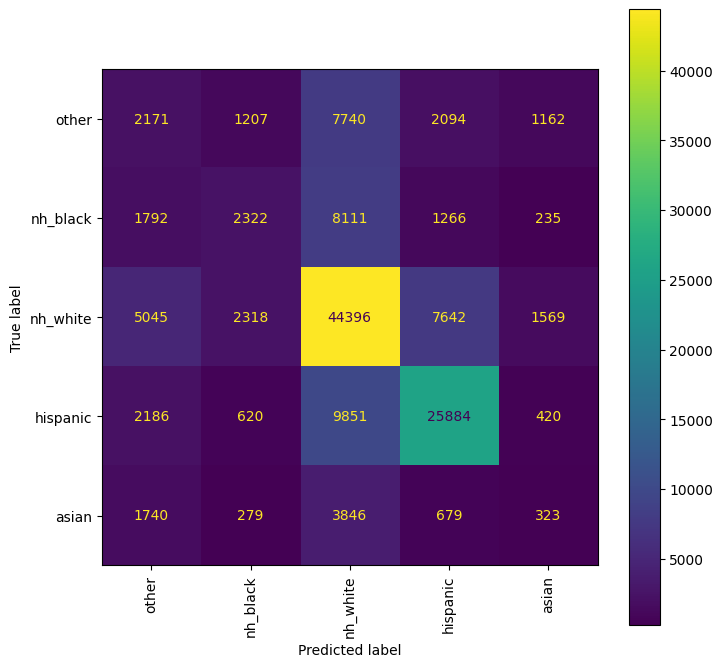

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline  

model_1m = joblib.load('models/rf_model_lastname_1M.joblib')
preds = model_1m.predict(X_test)
predicted = [id_to_race[p] for p in preds]
actual = [id_to_race[p] for p in y_test.values]

print(classification_report(actual, predicted))

cm = confusion_matrix(actual, predicted, labels=list(race_to_id.keys()))
cmp = ConfusionMatrixDisplay(cm, display_labels=list(race_to_id.keys()))
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax, xticks_rotation='vertical')

### For 2M Model

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:    3.1s remaining:    0.1s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    5.4s finished


              precision    recall  f1-score   support

       asian       0.09      0.05      0.06      6867
    hispanic       0.69      0.66      0.68     38961
    nh_black       0.34      0.17      0.23     13726
    nh_white       0.60      0.72      0.65     60970
       other       0.17      0.16      0.17     14374

    accuracy                           0.55    134898
   macro avg       0.38      0.35      0.36    134898
weighted avg       0.53      0.55      0.53    134898



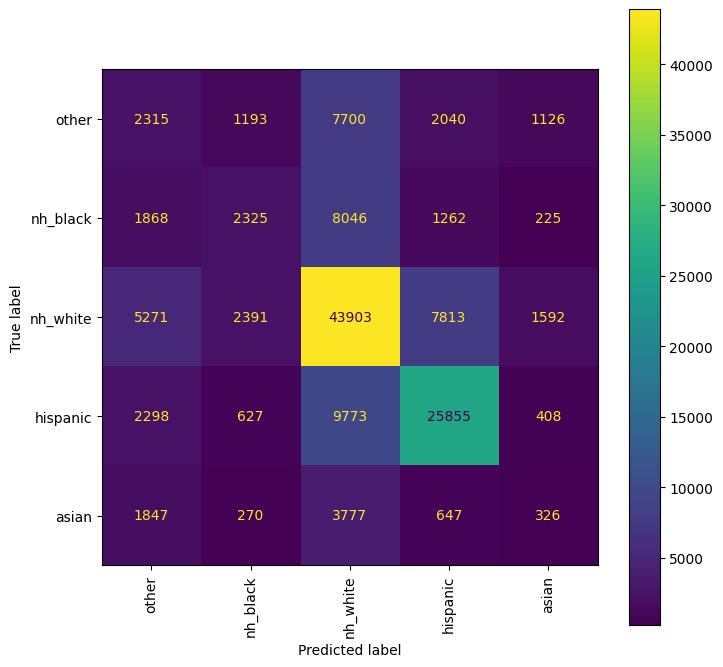

In [39]:
model_2m = joblib.load('models/rf_model_lastname_2M.joblib')
preds = model_2m.predict(X_test)
predicted = [id_to_race[p] for p in preds]
actual = [id_to_race[p] for p in y_test.values]

print(classification_report(actual, predicted))

cm = confusion_matrix(actual, predicted, labels=list(race_to_id.keys()))
cmp = ConfusionMatrixDisplay(cm, display_labels=list(race_to_id.keys()))
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax, xticks_rotation='vertical')

### For Model trained  with complete dataset (20 iterations)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of  20 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=10)]: Done   9 out of  20 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=10)]: Done  13 out of  20 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  17 out of  20 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:    1.4s finished


              precision    recall  f1-score   support

       asian       0.09      0.05      0.06      6867
    hispanic       0.68      0.66      0.67     38961
    nh_black       0.32      0.19      0.24     13726
    nh_white       0.61      0.70      0.65     60970
       other       0.17      0.17      0.17     14374

    accuracy                           0.55    134898
   macro avg       0.37      0.35      0.36    134898
weighted avg       0.53      0.55      0.53    134898



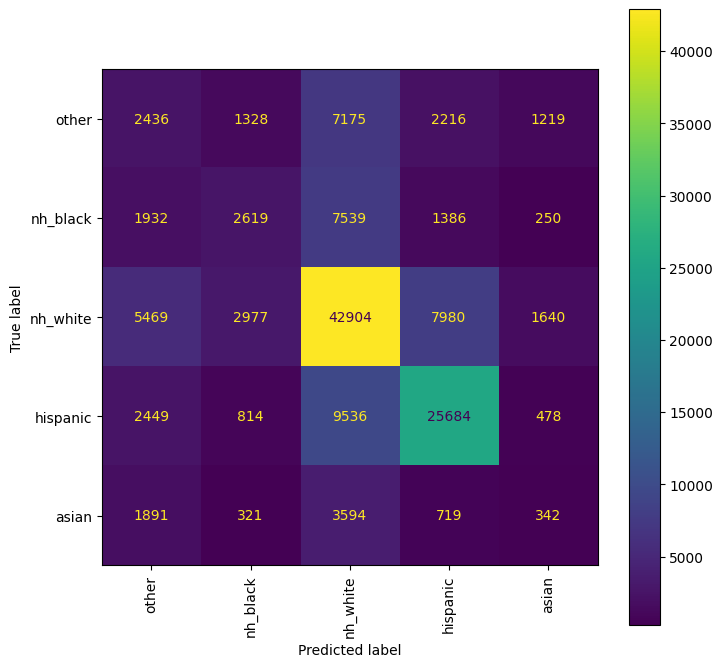

In [40]:
model_full = joblib.load('models/rf_model_lastname.joblib')
preds = model_full.predict(X_test)
predicted = [id_to_race[p] for p in preds]
actual = [id_to_race[p] for p in y_test.values]

print(classification_report(actual, predicted))

cm = confusion_matrix(actual, predicted, labels=list(race_to_id.keys()))
cmp = ConfusionMatrixDisplay(cm, display_labels=list(race_to_id.keys()))
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax, xticks_rotation='vertical')